In [1]:
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#関数の引数を調べる
import inspect
#inspect.signature(f)

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)
df.shape

(569, 32)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
#これで何が0,1,.....に当てられたかわかる
le.classes_

array(['B', 'M'], dtype=object)

In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#連結する処理としてスケーリング、主成分分析、ロジスティック回帰を指定
pipe_lr = Pipeline([('scl',StandardScaler()),('pca',PCA(n_components=2)),('clf',LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)

print('Test accuracy: %.3f' % pipe_lr.score(X_test,y_test))

Test accuracy: 0.947


In [8]:
a = np.random.rand(16).reshape(4,4)
a.shape

(4, 4)

In [9]:
a

array([[ 0.61398972,  0.7717892 ,  0.90283387,  0.51471847],
       [ 0.57437482,  0.40558384,  0.71343584,  0.57512343],
       [ 0.93263525,  0.37242386,  0.88072121,  0.23808158],
       [ 0.53198592,  0.322787  ,  0.14258575,  0.33047072]])

In [10]:
sc = StandardScaler()
(sc.fit_transform(a)).mean(axis=0)

array([ -3.60822483e-16,  -5.55111512e-17,   3.88578059e-16,
         2.22044605e-16])

k分割交差検証

In [11]:
from sklearn.cross_validation import StratifiedKFold
#分割元データ、分割数、乱数生成機の状態を指定し、層化k分割交差検証イテレータを表すStratifiedKFoldクラスのインスタンス化
kfold = StratifiedKFold(y= y_train, n_folds=10, random_state=1)
scores=[]
#イテレータのインデックスと要素をループ
#kには分割された番号が、train testにはそれぞれのインデックスが入っている
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train],y_train[train])
    score = pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist. %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))

Fold: 1, Class dist. [256 153], Acc: 0.891
Fold: 2, Class dist. [256 153], Acc: 0.978
Fold: 3, Class dist. [256 153], Acc: 0.978
Fold: 4, Class dist. [256 153], Acc: 0.913
Fold: 5, Class dist. [256 153], Acc: 0.935
Fold: 6, Class dist. [257 153], Acc: 0.978
Fold: 7, Class dist. [257 153], Acc: 0.933
Fold: 8, Class dist. [257 153], Acc: 0.956
Fold: 9, Class dist. [257 153], Acc: 0.978
Fold: 10, Class dist. [257 153], Acc: 0.956


In [12]:
#正解率の平均と標準偏差を出力
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.950 +/- 0.029


cross_val_score　めっちゃ便利

In [13]:
from sklearn.cross_validation import cross_val_score
#cross_val_score関数でモデルの正解率を算出
#推定器estimator、トレーニングデータX、予測値y、分割数cv、CPU数n_jobsを指定
scores = cross_val_score(estimator=pipe_lr, X=X_train,y=y_train, cv=10, n_jobs=1)
print('CV accuracy scores: %s' % scores)
#正解率の平均と標準偏差を出力
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [ 0.89130435  0.97826087  0.97826087  0.91304348  0.93478261  0.97777778
  0.93333333  0.95555556  0.97777778  0.95555556]
CV accuracy: 0.950 +/- 0.029


学習曲線関数

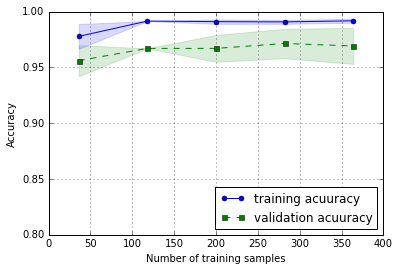

In [10]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
pipe_lr = Pipeline([('scl',StandardScaler()),('clf',LogisticRegression(penalty='l2',random_state=0))])

#learnig_curve関数で交差検証による正解率を算出
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,X=X_train, y=y_train,
                                                                                                  train_sizes=np.linspace(0.1,1.0,5),cv=5,n_jobs=1)
train_mean= np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean= np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes,train_mean, color='blue', marker='o',markersize=5, label='training acuuracy')
#fill_between関数で平均±標準偏差の幅を塗りつぶす
#トレーニングデータのサイズtrain_sizes、透明度alpha、などを指定
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')

plt.plot(train_sizes,test_mean, color='green', linestyle='--', marker='s',markersize=5, label='validation acuuracy')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])
plt.show()

In [15]:
np.linspace(0.1,1.0,10)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [16]:
train_scores[5]

array([ 0.99183673,  0.9877551 ,  0.99183673,  0.99183673,  0.99183673,
        0.99183673,  0.99183673,  0.99183673,  0.99183673,  0.99183673])

In [11]:
train_scores.shape

(5, 5)

In [17]:
train_sizes

array([ 40,  81, 122, 163, 204, 245, 286, 327, 368, 409])

検証曲線

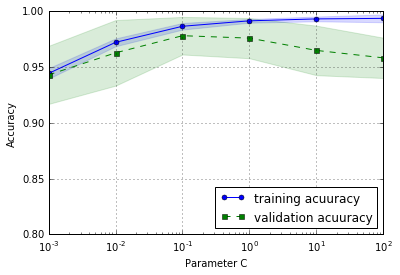

In [18]:
from sklearn.learning_curve import validation_curve
param_range = [0.001,0.01,0.1,1.0,10.0,100.0]
#validation_curve関数によりモデルのパラメータを変化させ、交差検証による正解率を算出
#clf_CはLogisticRegressionオブジェクトのパラメータ
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name='clf__C',
                                                                                param_range=param_range,cv=10)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores, axis=1)
test_mean= np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range,train_mean, color='blue', marker='o',markersize=5, label='training acuuracy')
#fill_between関数で平均±標準偏差の幅を塗りつぶす
#トレーニングデータのサイズtrain_sizes、透明度alpha、などを指定
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')

plt.plot(param_range,test_mean, color='green', linestyle='--', marker='s',markersize=5, label='validation acuuracy')

plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])
plt.show()

In [19]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [20]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
Version(sklearn_version)

グリッドサーチ

In [22]:
from sklearn.svm import SVC
SVC(kernel='rbf').get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': None,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [7]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
pipe_svc  = Pipeline([('scl',StandardScaler()),('clf',SVC(random_state=1))])
param_range = [0.0001, 0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
#Cを大きくすると誤分類を許さない   gammaを大きくするとサンプル間の距離が大きく評価され過学習になりやすい
#つまりどちらのパラメータも大きくしすぎると過学習
param_grid = [{'clf__C': param_range, 'clf__kernel': ['linear']},
                          {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]
#ハイパーパラメータ値のリストparam_gridを指定し、グリッドサーチを行うGridSearchCVクラスのインスタンス化
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs.fit(X_train,y_train)
#モデルの最良スコアを出力
print(gs.best_score_)
#最良スコアとなるパラメータ値を出力
print(gs.best_params_)

NameError: name 'Pipeline' is not defined

In [24]:
#gs.predictとgs.best_estimator_.predictは同じ！
gs.predict(X_test)

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [25]:
#他のすべての結果
for params, mean_score, scores in gs.grid_scores_:
    print("%0.3f (+/-%0.3f) for %r" % (mean_score, score.std(), params))

0.642 (+/-0.000) for {'clf__kernel': 'linear', 'clf__C': 0.0001}
0.938 (+/-0.000) for {'clf__kernel': 'linear', 'clf__C': 0.001}
0.960 (+/-0.000) for {'clf__kernel': 'linear', 'clf__C': 0.01}
0.978 (+/-0.000) for {'clf__kernel': 'linear', 'clf__C': 0.1}
0.976 (+/-0.000) for {'clf__kernel': 'linear', 'clf__C': 1.0}
0.971 (+/-0.000) for {'clf__kernel': 'linear', 'clf__C': 10.0}
0.952 (+/-0.000) for {'clf__kernel': 'linear', 'clf__C': 100.0}
0.945 (+/-0.000) for {'clf__kernel': 'linear', 'clf__C': 1000.0}
0.626 (+/-0.000) for {'clf__kernel': 'rbf', 'clf__C': 0.0001, 'clf__gamma': 0.0001}
0.626 (+/-0.000) for {'clf__kernel': 'rbf', 'clf__C': 0.0001, 'clf__gamma': 0.001}
0.626 (+/-0.000) for {'clf__kernel': 'rbf', 'clf__C': 0.0001, 'clf__gamma': 0.01}
0.626 (+/-0.000) for {'clf__kernel': 'rbf', 'clf__C': 0.0001, 'clf__gamma': 0.1}
0.626 (+/-0.000) for {'clf__kernel': 'rbf', 'clf__C': 0.0001, 'clf__gamma': 1.0}
0.626 (+/-0.000) for {'clf__kernel': 'rbf', 'clf__C': 0.0001, 'clf__gamma': 10.0}

In [26]:
#最良のモデルをテストデータセットにかける
clf = gs.best_estimator_
#まずはトレーニングセット全体でトレーニングを行う
clf.fit(X_train,y_train)

print('Test accuracy: %.3f' % clf.score(X_test,y_test))

Test accuracy: 0.965


In [27]:
X_train.shape

(455, 30)

主成分分析も加えてやってみる

In [14]:
type(X_train)

numpy.ndarray

In [9]:
X_train.shape

(455, 30)

In [10]:
y_train.shape

(455,)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
pipe_svc1  = Pipeline([('scl',StandardScaler()),('pca',PCA()),('clf',SVC(random_state=1))])
param_range = [0.0001, 0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
compo_range = [2,3,4,5,6,7,8,9,10]
#Cを大きくすると誤分類を許さない   gammaを大きくするとサンプル間の距離が大きく評価され過学習になりやすい
#つまりどちらのパラメータも大きくしすぎると過学習
param_grid = [{'pca__n_components':compo_range,'clf__C': param_range, 'clf__kernel': ['linear']},
                          {'pca__n_components':compo_range,'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]
#ハイパーパラメータ値のリストparam_gridを指定し、グリッドサーチを行うGridSearchCVクラスのインスタンス化
gs = GridSearchCV(estimator=pipe_svc1, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs.fit(X_train,y_train)
#モデルの最良スコアを出力
print(gs.best_score_)
#最良スコアとなるパラメータ値を出力
print(gs.best_params_)

0.98021978022
{'clf__C': 1.0, 'clf__kernel': 'linear', 'pca__n_components': 8}


In [29]:
#最良のモデルをテストデータセットにかける
clf = gs.best_estimator_
#まずはトレーニングセット全体でトレーニングを行う
clf.fit(X_train,y_train)

print('Test accuracy: %.3f' % clf.score(X_test,y_test))

Test accuracy: 0.974


In [30]:
import scipy as sp
sp.stats.uniform(0.5,0.5),

(<scipy.stats._distn_infrastructure.rv_frozen at 0x11b251be0>,)

In [31]:
N = 10000
x = np.random.uniform(0.5, 0.5,N)

In [32]:
x

array([ 0.5,  0.5,  0.5, ...,  0.5,  0.5,  0.5])

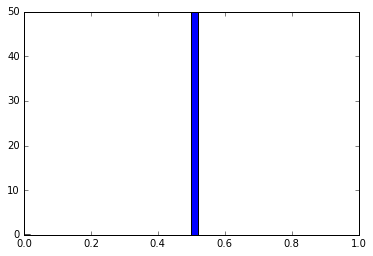

In [33]:
nbins = 50
plt.hist(x, nbins, normed=True)
plt.show()


            gs.predictとgs.best_estimator_.predictは同じ！

In [34]:
param_range = [0.0001, 0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
#Cを大きくすると誤分類を許さない   gammaを大きくするとサンプル間の距離が大きく評価され過学習になりやすい
#つまりどちらのパラメータも大きくしすぎると過学習
param_grid = [{'clf__C': param_range, 'clf__kernel': ['linear']},
                          {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid, scoring='accuracy',cv=2,n_jobs=-1)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.965 +/- 0.025


In [35]:
scores

array([ 0.95604396,  0.92307692,  1.        ,  0.96703297,  0.97802198])

In [36]:
from sklearn.tree import DecisionTreeClassifier
#ハイパーパラメータ値として決定木の深さパラメータを指定し、グリッドサーチを行うGrifSearchCVクラスをインスタンス化
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                                  param_grid = [{'max_depth': [1,2,3,4,5,6,7,None]}],
                                  scoring='accuracy',cv=2)
scores = cross_val_score(gs,X_train,y_train,scoring='accuracy',cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.921 +/- 0.029


In [37]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier().get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [38]:
#混合行列を生成
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

confmat = confusion_matrix(y_true= y_test, y_pred= y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


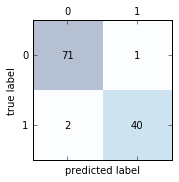

In [39]:
#図のサイズを指定
fig, ax= plt.subplots(figsize=(2.5,2.5))
#matshow関数で行列からヒートマップを描画
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center') #件数を表示
        
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [40]:
#適合率、再現率、F１スコアを出力
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Precision: %.3f' % (precision_score(y_true=y_test, y_pred= y_pred)))
print('Precision: %.3f' % (recall_score(y_true=y_test, y_pred= y_pred)))
print('Precision: %.3f' % (f1_score(y_true=y_test, y_pred= y_pred)))

Precision: 0.976
Precision: 0.952
Precision: 0.964


In [41]:
from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score, pos_label=0)

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring=scorer, cv=10)

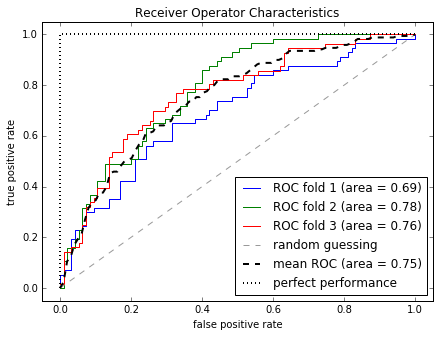

In [42]:
##ROCの曲線描画
from sklearn.metrics import roc_curve, auc
from scipy import interp

#スケーリング、主成分分析、ロジスティック回帰を指定してPipelineクラスをインスタンス化
pipe_lr = Pipeline([('scl',StandardScaler()),
                                 ('pca',PCA(n_components=2)),
                                 ('clf', LogisticRegression(penalty='l2', random_state=0, C=100.0))])

#二つの特徴量を抽出
X_train2 = X_train[:, [4,14]]
#層化k分割交差検証イテレータのStratifiedKFoldクラスをインスタンス化(分割数を3にしている)
cv = StratifiedKFold(y_train, n_folds=3, random_state=1)
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
#0から1までの間で100個の要素を生成
mean_fpr = np.linspace(0,1,100)
all_tpr = []
for i, (train, test) in enumerate(cv):
    #predict_probaメソッドで確率を予測、fitメソッドでモデルに適合させる
    probas = pipe_lr.fit(X_train2[train],y_train[train]).predict_proba(X_train2[test])
    #roc_curve関数でROC曲線の性能を計算してプロット
    #probasの一列目は1である確率(0列目が0である確率)
    #pos_label で1を陽性に指定
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    #interpは線形補間(fprを横軸に取ってtprの折れ線グラフを書いたときにmean_fprがどこに位置するか)
    #あとでlen(cv)で割っている
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr) #曲線下面積(AUC)を計算
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
    
#当て推量をプロット
plt.plot([0,1], [0,1], linestyle='--', color=(0.6,0.6,0.6), label='random guessing')
#FPR, TRR, ROC, AUC それぞれの平均を計算してプロット
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
#3つのグループの平均AUCを計算
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
#完全に正解したときのROC曲線をプロット
plt.plot([0,0,1], [0,1,1], lw=2, linestyle=':', color='black', label='perfect performance')
#グラフの各項目を指定
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristics')
plt.legend(loc='lower right')
plt.show()

In [43]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

#スケーリング、主成分分析、ロジスティック回帰を指定してPipelineクラスをインスタンス化
pipe_lr = Pipeline([('scl',StandardScaler()),
                                 ('pca',PCA(n_components=2)),
                                 ('clf', LogisticRegression(penalty='l2', random_state=0, C=100.0))])

#二つの特徴量を抽出
X_train2 = X_train[:, [4,14]]
#層化k分割交差検証イテレータのStratifiedKFoldクラスをインスタンス化(分割数を3にしている)
cv = StratifiedKFold(y_train, n_folds=3, random_state=1)
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
#0から1までの間で100個の要素を生成
mean_fpr = np.linspace(0,1,100)
all_tpr = []

X_test2 = X_test[:, [4,14]]
probas = pipe_lr.fit(X_train2,y_train).predict_proba(X_test2)
#roc_curve関数でROC曲線の性能を計算してプロット
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)

In [44]:
fpr

array([ 0.        ,  0.        ,  0.01388889,  0.01388889,  0.02777778,
        0.02777778,  0.05555556,  0.05555556,  0.08333333,  0.08333333,
        0.09722222,  0.09722222,  0.125     ,  0.125     ,  0.13888889,
        0.13888889,  0.16666667,  0.16666667,  0.18055556,  0.18055556,
        0.19444444,  0.19444444,  0.22222222,  0.22222222,  0.23611111,
        0.23611111,  0.25      ,  0.25      ,  0.40277778,  0.40277778,
        0.45833333,  0.45833333,  0.48611111,  0.48611111,  0.5       ,
        0.5       ,  0.52777778,  0.52777778,  0.56944444,  0.56944444,
        0.59722222,  0.59722222,  0.66666667,  0.66666667,  0.72222222,
        0.72222222,  0.79166667,  0.79166667,  0.83333333,  0.83333333,  1.        ])

In [45]:
tpr

array([ 0.02380952,  0.07142857,  0.07142857,  0.28571429,  0.28571429,
        0.35714286,  0.35714286,  0.38095238,  0.38095238,  0.4047619 ,
        0.4047619 ,  0.42857143,  0.42857143,  0.45238095,  0.45238095,
        0.47619048,  0.47619048,  0.5       ,  0.5       ,  0.54761905,
        0.54761905,  0.57142857,  0.57142857,  0.5952381 ,  0.5952381 ,
        0.64285714,  0.64285714,  0.69047619,  0.69047619,  0.71428571,
        0.71428571,  0.76190476,  0.76190476,  0.78571429,  0.78571429,
        0.80952381,  0.80952381,  0.83333333,  0.83333333,  0.85714286,
        0.85714286,  0.88095238,  0.88095238,  0.9047619 ,  0.9047619 ,
        0.92857143,  0.92857143,  0.97619048,  0.97619048,  1.        ,  1.        ])

In [46]:
thresholds

array([ 0.92705838,  0.84818441,  0.84603236,  0.70433578,  0.6992612 ,
        0.66011593,  0.64670223,  0.63124513,  0.6252612 ,  0.61442044,
        0.59710012,  0.59407127,  0.57145401,  0.56819911,  0.56304064,
        0.53723503,  0.4656605 ,  0.46289856,  0.45826003,  0.43378513,
        0.42254045,  0.41775617,  0.39395828,  0.39087418,  0.37820248,
        0.36096894,  0.35660996,  0.35272283,  0.31878074,  0.31132387,
        0.29076621,  0.28530875,  0.27315072,  0.27190803,  0.26490663,
        0.26464431,  0.25890534,  0.25392103,  0.23811928,  0.23571407,
        0.22286924,  0.21525332,  0.17829231,  0.17661834,  0.167953  ,
        0.16605363,  0.16173902,  0.13691314,  0.11246706,  0.1100227 ,
        0.04384959])

In [47]:
len(probas[:,1])

114

In [48]:
#関数の引数を調べる
import inspect
inspect.signature(roc_curve)

<Signature (y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)>

In [49]:
interp(mean_fpr, fpr, tpr)

array([ 0.07142857,  0.07142857,  0.28571429,  0.35714286,  0.35714286,
        0.35714286,  0.38095238,  0.38095238,  0.38095238,  0.4047619 ,
        0.42857143,  0.42857143,  0.42857143,  0.45238095,  0.47619048,
        0.47619048,  0.47619048,  0.5       ,  0.54761905,  0.54761905,
        0.57142857,  0.57142857,  0.5952381 ,  0.5952381 ,  0.64285714,
        0.69047619,  0.69047619,  0.69047619,  0.69047619,  0.69047619,
        0.69047619,  0.69047619,  0.69047619,  0.69047619,  0.69047619,
        0.69047619,  0.69047619,  0.69047619,  0.69047619,  0.69047619,
        0.71428571,  0.71428571,  0.71428571,  0.71428571,  0.71428571,
        0.71428571,  0.76190476,  0.76190476,  0.76190476,  0.78571429,
        0.80952381,  0.80952381,  0.80952381,  0.83333333,  0.83333333,
        0.83333333,  0.83333333,  0.85714286,  0.85714286,  0.85714286,
        0.88095238,  0.88095238,  0.88095238,  0.88095238,  0.88095238,
        0.88095238,  0.9047619 ,  0.9047619 ,  0.9047619 ,  0.90

In [50]:
inspect.signature(interp)

<Signature (x, xp, fp, left=None, right=None, period=None)>

In [51]:
xp = [1, 2, 3]
fp = [6, 2, 1]
np.interp([1.5, 2.5], xp, fp)

array([ 4. ,  1.5])

In [52]:
np.interp(2.5, xp, fp)

1.5

In [53]:
np.interp(1.1, xp, fp)

5.6

In [54]:
#roc_auc_score関数でAUC値のみ出力できる

##予測値のAUCと正解率を計算して出力
pipe_lr = pipe_lr.fit(X_train2, y_train)
y_pred2 = pipe_lr.predict(X_test[:, [4,14]])
from sklearn.metrics import roc_auc_score, accuracy_score
print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_pred2))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred2))

ROC AUC: 0.662
Accuracy: 0.711


In [55]:
y_pred2

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

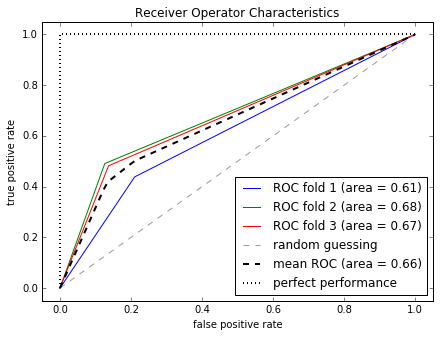

In [56]:
#層化k分割交差検証イテレータのStratifiedKFoldクラスをインスタンス化(分割数を3にしている)
cv = StratifiedKFold(y_train, n_folds=3, random_state=1)
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
#0から1までの間で100個の要素を生成
mean_fpr = np.linspace(0,1,100)
all_tpr = []
for i, (train, test) in enumerate(cv):
    #predict_probaメソッドで確率を予測、fitメソッドでモデルに適合させる
    probas = pipe_lr.fit(X_train2[train],y_train[train]).predict(X_train2[test])
    #roc_curve関数でROC曲線の性能を計算してプロット
    #probasの一列目は1である確率
    #pos_label で1を陽性に指定
    fpr, tpr, thresholds = roc_curve(y_train[test], probas, pos_label=1)
    #interpは線形補間(fprを横軸に取ってtprの折れ線グラフを書いたときにmean_fprがどこに位置するか)
    #あとでlen(cv)で割っている
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr) #曲線下面積(AUC)を計算
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
    
#当て推量をプロット
plt.plot([0,1], [0,1], linestyle='--', color=(0.6,0.6,0.6), label='random guessing')
#FPR, TRR, ROC, AUC それぞれの平均を計算してプロット
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
#3つのグループの平均AUCを計算
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
#完全に正解したときのROC曲線をプロット
plt.plot([0,0,1], [0,1,1], lw=2, linestyle=':', color='black', label='perfect performance')
#グラフの各項目を指定
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristics')
plt.legend(loc='lower right')
plt.show()

predict_probaをpredictをすることはROC曲線のしきい値を一つに決めていることと同じ

正解率はROC曲線における1つのしきい値である

In [57]:
pre_scorer = make_scorer(score_func=precision_score,
                                               pos_label=1,greater_is_better=True, average='micro')